In [1]:
#1.Data Collection: Obtain a dataset with numerical features and a target variable forprediction.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv("Housing.csv")

print(dataset.head())

label_encoder = LabelEncoder()
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for column in categorical_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

X = dataset.drop('price', axis=1)
y = dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Mean Squared Error: 1771751116594.0344
R-squared Score: 0.6494754192267804


Mean Squared Error: 1771751116594.0344
R-squared Score: 0.6494754192267804
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int32
 6   guestroom         545 non-null    int32
 7   basement          545 non-null    int32
 8   hotwaterheating   545 non-null    int32
 9   airconditioning   545 non-null    int32
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int32
 12  furnishingstatus  545 non-null    int32
dtypes: int32(7), int64(6)
memory usage: 40.6 KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+0

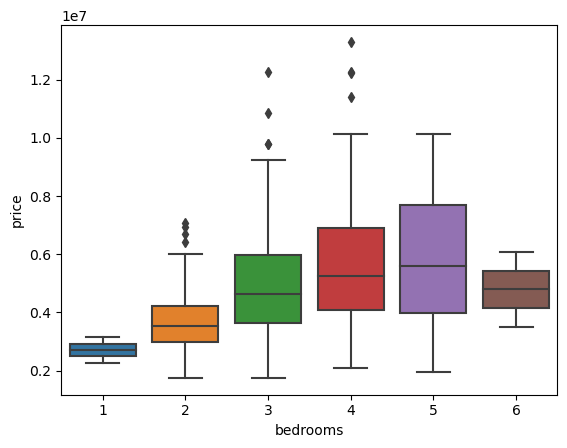

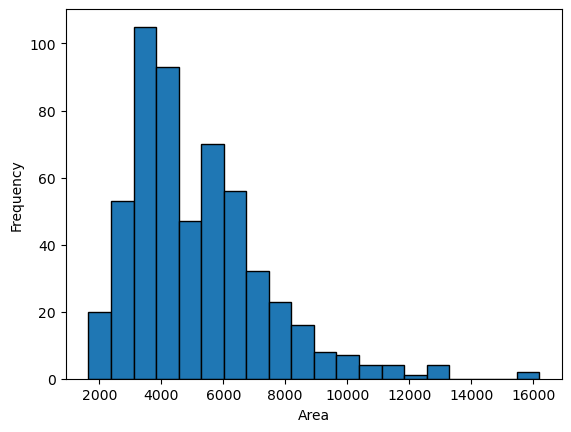

              price          area    bedrooms   bathrooms     stories  \
count  2.370000e+02    237.000000  237.000000  237.000000  237.000000   
mean   4.052838e+06   4676.185654    2.780591    1.164557    1.611814   
std    1.276966e+06   1681.597943    0.690709    0.393713    0.604667   
min    1.750000e+06   1700.000000    1.000000    1.000000    1.000000   
25%    3.150000e+06   3570.000000    2.000000    1.000000    1.000000   
50%    3.850000e+06   4079.000000    3.000000    1.000000    2.000000   
75%    4.620000e+06   5495.000000    3.000000    1.000000    2.000000   
max    9.100000e+06  10500.000000    4.000000    3.000000    3.000000   

       mainroad  guestroom    basement  hotwaterheating  airconditioning  \
count     237.0      237.0  237.000000            237.0       237.000000   
mean        1.0        0.0    0.248945              0.0         0.248945   
std         0.0        0.0    0.433317              0.0         0.433317   
min         1.0        0.0    0.000000

In [2]:
#2.Data Exploration and Cleaning: Explore the dataset to understand its structure, handle missing values, and ensure data quality.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("Housing.csv")

label_encoder = LabelEncoder()
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for column in categorical_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

X = dataset.drop('price', axis=1)
y = dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

print(dataset.info())
print(dataset.describe())
print(dataset.head())

print(dataset.isnull().sum())

dataset = dataset.dropna()

print(dataset.isnull().sum())

sns.boxplot(x='bedrooms', y='price', data=dataset)
plt.show()

plt.hist(dataset['area'], bins=20, edgecolor='black')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

print(dataset.describe())

dataset = dataset.drop_duplicates()

print(dataset.info())


Mean Squared Error: 1771751116594.0344
R-squared Score: 0.6494754192267804
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int32
 6   guestroom         545 non-null    int32
 7   basement          545 non-null    int32
 8   hotwaterheating   545 non-null    int32
 9   airconditioning   545 non-null    int32
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int32
 12  furnishingstatus  545 non-null    int32
dtypes: int32(7), int64(6)
memory usage: 40.6 KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+0

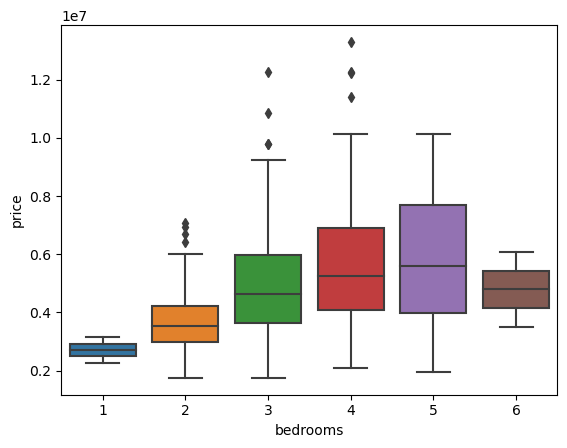

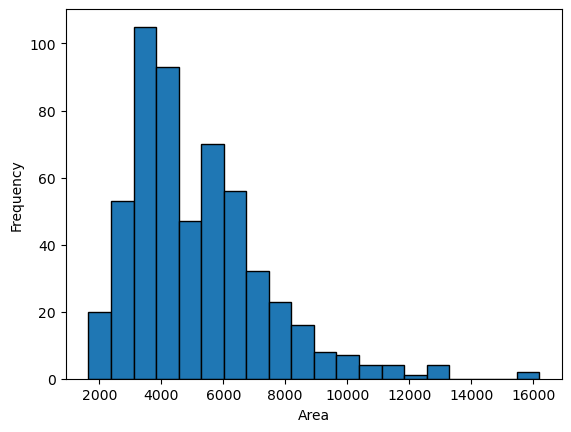

              price          area    bedrooms   bathrooms     stories  \
count  2.370000e+02    237.000000  237.000000  237.000000  237.000000   
mean   4.052838e+06   4676.185654    2.780591    1.164557    1.611814   
std    1.276966e+06   1681.597943    0.690709    0.393713    0.604667   
min    1.750000e+06   1700.000000    1.000000    1.000000    1.000000   
25%    3.150000e+06   3570.000000    2.000000    1.000000    1.000000   
50%    3.850000e+06   4079.000000    3.000000    1.000000    2.000000   
75%    4.620000e+06   5495.000000    3.000000    1.000000    2.000000   
max    9.100000e+06  10500.000000    4.000000    3.000000    3.000000   

       mainroad  guestroom    basement  hotwaterheating  airconditioning  \
count     237.0      237.0  237.000000            237.0       237.000000   
mean        1.0        0.0    0.248945              0.0         0.248945   
std         0.0        0.0    0.433317              0.0         0.433317   
min         1.0        0.0    0.000000

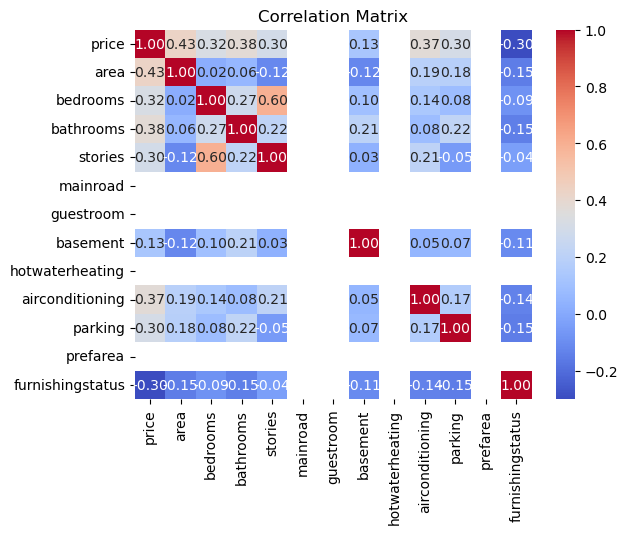

Mean Squared Error (Selected Features): 2043076101623.3638
R-squared Score (Selected Features): 0.5957962790022013


In [3]:
#3.Feature Selection: Identify relevant features that may contribute to the predictive model.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("Housing.csv")

label_encoder = LabelEncoder()
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for column in categorical_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

X = dataset.drop('price', axis=1)
y = dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

print(dataset.info())
print(dataset.describe())
print(dataset.head())

print(dataset.isnull().sum())

dataset = dataset.dropna()

print(dataset.isnull().sum())

sns.boxplot(x='bedrooms', y='price', data=dataset)
plt.show()

plt.hist(dataset['area'], bins=20, edgecolor='black')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

print(dataset.describe())

dataset = dataset.drop_duplicates()

print(dataset.info())

correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

target_correlation = correlation_matrix['price'].abs().sort_values(ascending=False)
relevant_features = target_correlation[target_correlation >= 0.2].index

relevant_features = relevant_features.drop('price', errors='ignore')

X_selected = X[relevant_features]

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model_selected = LinearRegression()

model_selected.fit(X_train_selected, y_train_selected)

y_pred_selected = model_selected.predict(X_test_selected)

mse_selected = mean_squared_error(y_test_selected, y_pred_selected)
r2_selected = r2_score(y_test_selected, y_pred_selected)

print(f'Mean Squared Error (Selected Features): {mse_selected}')
print(f'R-squared Score (Selected Features): {r2_selected}')


In [4]:
#4.Model Training: Implement linear regression using a machine learning library (e.g., ScikitLearn).
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv("Housing.csv")

label_encoder = LabelEncoder()
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for column in categorical_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

X = dataset.drop('price', axis=1)
y = dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Squared Error: 1771751116594.0344
R-squared Score: 0.6494754192267804


In [5]:
#5.Model Evaluation: Evaluate the model's performance on a separate test dataset using metrics such as Mean Squared Error or R-squared.

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')



Mean Squared Error: 1771751116594.0344
R-squared Score: 0.6494754192267804


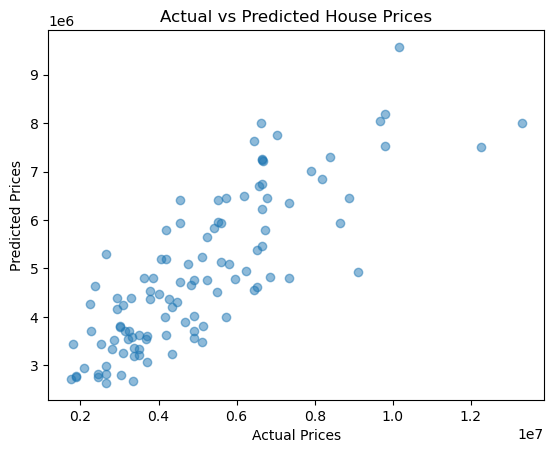

In [6]:
#6.Visualization: Create visualizations to illustrate the relationship between the predicted and actual values.
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
